In [0]:
!pip install -q sklearn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection,linear_model,metrics
import seaborn as sns
from IPython.display import clear_output
from six.moves import urllib
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
l2020 = {}


In [0]:
data = pd.read_csv('/content/rainfall.csv')
data = data[["YEAR","DEC"]]

In [0]:
predict = "DEC"
x = np.array(data.drop([predict],1))
y = np.array(data[predict])
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size = 0.1)
sc_x= StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = np.reshape(y,(-1,1))
y = sc_y.fit_transform(y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1.55273149]
-0.12150370985849634


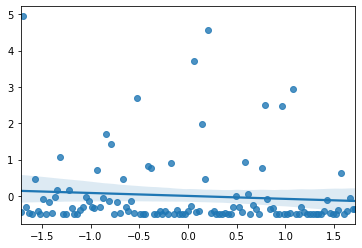

In [0]:
regressor = SVR(kernel='rbf')
regressor.fit(x,y)
sns.regplot(x,y,fit_reg=True)
#y_predict = sc_y.inverse_transform ((regressor.predict (sc_x.transform(x_test))))
y_predict = sc_y.inverse_transform ((regressor.predict (sc_x.transform(np.array([[2020]])))))
print(y_predict)
print(regressor.score(x,y))

In [0]:
l2020[predict] = y_predict[0]
print(l2020)

{'JAN': 0.6486056688075466, 'FEB': 0.5560251189161134, 'MAR': 2.006355121881904, 'APR': 3.7523856304225935, 'MAY': 9.78160861989048, 'JUN': 177.92446300003735, 'JUL': 282.92494921477197, 'AUG': 223.67087485275044, 'SEP': 169.46252092983545, 'OCT': 61.04319998571669, 'NOV': 9.037701456243354, 'DEC': 1.5527314883245342}
